- ## Section 1 : Introduction

Introduction à l'utilisation du perceptron pour la classification linéaire. Ce notebook comprend des fonctions pour entraîner un perceptron en utilisant des approches batch et online, ainsi que pour visualiser les résultats.

- ## Section 2 : Importation des bibliothèques


In [1]:
import numpy as np
import matplotlib.pyplot as plt

- ## Section 3 : Définition des fonctions


Définition des fonctions utilisées pour entraîner le perceptron et visualiser les frontières de décision.


In [2]:
def plot_perceptron(points, labels, weights1,weights2):
    
    
    points = np.array(points)
    labels = np.array(labels)
    
    
    class_0 = points[labels == 0]
    class_1 = points[labels == 1]

    
    plt.scatter(class_0[:, 0], class_0[:, 1], color='red', label='Class 0')
    plt.scatter(class_1[:, 0], class_1[:, 1], color='blue', label='Class 1')
    
    
    
    x_values = np.array([points[:, 0].min(), points[:, 0].max()])
    y_values = -(weights1[0] + weights1[1] * x_values) / weights1[2]
    
    
    x_values2 = np.array([points[:, 0].min(), points[:, 0].max()])
    y_values2 = -(weights2[0] + weights2[1] * x_values) / weights2[2]

    
    
    
    
    plt.plot(x_values, y_values, color='black', label='Batch')
    plt.plot(x_values2, y_values2, color='green', label='Online')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Perceptron')
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
def perceptron_online(points, labels, weights, alpha, epochs=1000):
    points = np.array(points)
    labels = np.array(labels)
    weights = np.array(weights)
    points = np.insert(points, 0, 1, axis=1)  
    iterations = 0
    for epoch in range(epochs):
        all_correctly_classified = True
        indices = np.arange(len(points))
        np.random.shuffle(indices)
        for i in indices:
            x = points[i]
            t = labels[i]
            y = 1 if np.dot(weights.T, x) > 0 else 0
            if y != t:
                all_correctly_classified = False 
                weights += alpha * (t - y) * x

        iterations += 1
        if all_correctly_classified:
            break
    return weights.tolist(), iterations

In [4]:
def perceptron_batch(points, labels, weights, alpha):
    
    
    points = np.array(points)
    labels = np.array(labels)
    weights = np.array(weights)
    iterations = 0
    points = np.insert(points, 0, 1, axis=1)
    
    while True:
        delta_w = np.zeros_like(weights)
        all_correctly_classified = True

        for x, t in zip(points, labels):
            
            y = 1 if np.dot(weights.T, x) > 0 else 0
            
            
            if y != t:
                all_correctly_classified = False
                delta_w += alpha * (t - y) * x
        
        
        weights += delta_w
        iterations += 1        

        
        if all_correctly_classified:
            break
    return weights.tolist(),iterations


In [5]:
def generate_ls_data_wide_range(N, dim, weights_teacher):
    
    
    points = np.random.uniform(-100, 100, (N, dim))
    
    
    points_with_bias = np.insert(points, 0, 1, axis=1)
    
    
    labels = np.where(np.dot(points_with_bias, weights_teacher) > 0, 1, 0)
    
    return points, labels


In [6]:
def calculate_overlap(weights_teacher, weights_student):
    
    weights_teacher = np.array(weights_teacher)
    weights_student = np.array(weights_student)
    
    dot_product = np.dot(weights_teacher, weights_student)
    
    norm_teacher = np.linalg.norm(weights_teacher)
    norm_student = np.linalg.norm(weights_student)
    
    cosine_angle = dot_product / (norm_teacher * norm_student)
    
    return cosine_angle



In [7]:
def run_tests(dimensions, points, etas, perceptron_function):
    results = np.zeros((len(dimensions), len(points), len(etas), 2))  # 2 pour <IT> et <R>
    
    for i, N in enumerate(dimensions):
        for j, P in enumerate(points):
            for k, eta in enumerate(etas):
                print(f'Running tests for N={N}, P={P}, and eta={eta}...')                
                iterations = []
                overlaps = []
                for _ in range(50):  # 50 tirages aléatoires
                    # Générer des données linéairement séparables
                    weights_teacher = np.random.randn(N + 1)
                    points_T, labels_T = generate_ls_data_wide_range(P, N, weights_teacher)
                    initial_weights_student = np.random.randn(N + 1)

                    # Entraînement du perceptron
                    final_weights, it = perceptron_function(points_T, labels_T, initial_weights_student, eta)
                    overlap = calculate_overlap(weights_teacher, final_weights)
                    
                    iterations.append(it)
                    overlaps.append(overlap)
                
                # Calcul de la moyenne pour les itérations et le rapport
                results[i, j, k, 0] = np.mean(iterations)
                results[i, j, k, 1] = np.mean(overlaps)
    
    return results


In [8]:

# Fonction pour afficher les résultats sous forme de tableau
def format_results(N_values, P_values, eta_values, results_batch, results_online):
    for eta_index, eta in enumerate(eta_values):
        print(f'eta={eta}')
        print('+--------+' + '+------------------' * len(P_values) + '+')
        print('|   N\P   | ' + ' | '.join(f'{P:>16}' for P in P_values) + ' |')
        print('+--------+' + '+------------------' * len(P_values) + '+')
        for N_index, N in enumerate(N_values):
            batch_results = ' | '.join(
                f'<{results_batch[N_index, j, eta_index, 0]:.2f};{results_batch[N_index, j, eta_index, 1]:.2f}>'
                for j, P in enumerate(P_values)
            )
            online_results = ' | '.join(
                f'<{results_online[N_index, j, eta_index, 0]:.2f};{results_online[N_index, j, eta_index, 1]:.2f}>'
                for j, P in enumerate(P_values)
            )
            print(f'| {N:<6} | {batch_results} |')
            print('+--------+' + '+------------------' * len(P_values) + '+')
            print(f'| {N:<6} | {online_results} |')
            print('+--------+' + '+------------------' * len(P_values) + '+')
        print('\n')

- ## Section 4 : Exemple d'entraînement et de visualisation


Exemple d'application du perceptron pour classer des points et visualiser les frontières de décision.


[-0.8500000000000001, 0.7, 0.75]
[-0.4, 0.24999999999999994, 0.3]


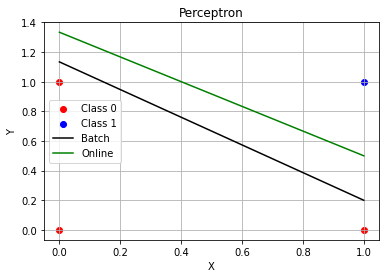

[-0.4, 0.7, 0.75]
[-0.4, 0.7, 0.75]


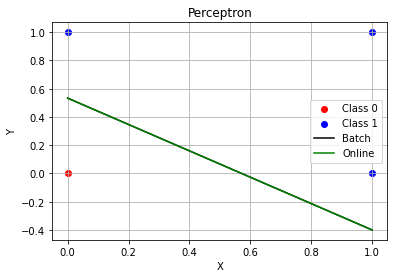

[0.04999999999999999, 0.7, -0.6000000000000001]
[0.5, 2.2, -0.44999999999999996]


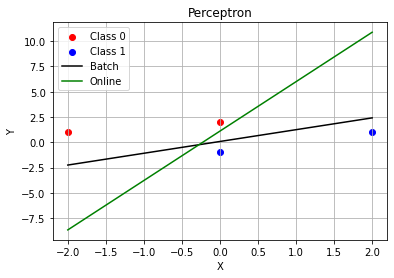

In [9]:

points_example = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels_example = [0, 0, 0, 1]
initial_weights = [0.5, 0.7, 0.3]  # w0, w1, w2
learning_rate = 0.45

final_weights1,iter=perceptron_batch(points_example, labels_example, initial_weights, learning_rate)
print(final_weights1)

final_weights2,iter=perceptron_online(points_example, labels_example, initial_weights,learning_rate)
print(final_weights2)
plot_perceptron( points_example, labels_example, final_weights1,final_weights2)


# "ou" exemple
points_example = [(0, 0), (0, 1), (1, 0), (1, 1)]
labels_example = [0, 1, 1, 1]

final_weights1,iter=perceptron_batch(points_example, labels_example, initial_weights, learning_rate)
print(final_weights1)

final_weights2,iter=perceptron_online(points_example, labels_example, initial_weights, learning_rate)
print(final_weights2)
plot_perceptron( points_example, labels_example, final_weights1,final_weights2)


points_cls = [(2, 1), (0, -1), (-2, 1), (0, 2)]
labels_cls = [1, 1, 0, 0]

final_weights1,iter=perceptron_batch(points_cls, labels_cls, initial_weights, learning_rate)
print(final_weights1)

final_weights2,iter=perceptron_online(points_cls, labels_cls, initial_weights, 0.75)
print(final_weights2)
plot_perceptron( points_cls, labels_cls, final_weights1,final_weights2)

- ### Questions 1 et 2

visualisation des points LS


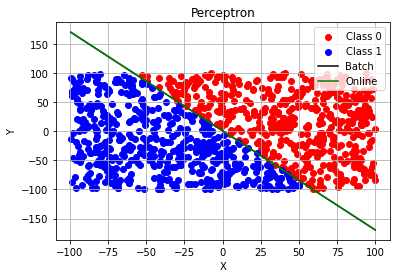

Batch Perceptron Final Weights: [30.566284085897877, -18627.951613703, -11069.270749148029]
Nombre d'itération batch:  8
Online Perceptron Final Weights: [-21.2337159141021, -631.3999321934176, -375.4481337985901]


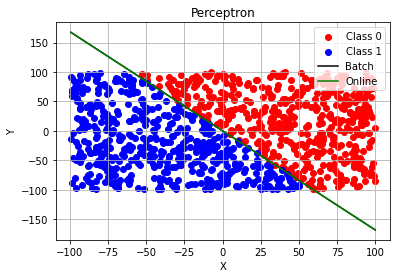

Nombre d'itérations online:  29
Rapport Batch:  0.9639429153935086
Rapport online:  0.9554360332547331


In [10]:

N = 1000
dim = 2
weights_teacher = np.random.randn(dim + 1)


points_T, labels_T = generate_ls_data_wide_range(N, dim, weights_teacher)
print("visualisation des points LS")
plot_perceptron(points_T, labels_T, weights_teacher,weights_teacher)



initial_weights_student = np.random.randn(dim + 1)


alpha = 0.7


final_weights_batch,ite_batch = perceptron_batch(points_T, labels_T, initial_weights_student, alpha)
print("Batch Perceptron Final Weights:", final_weights_batch)
print("Nombre d'itération batch: ",ite_batch)


final_weights_online, ite_online = perceptron_online(points_T, labels_T, initial_weights_student, alpha)
print("Online Perceptron Final Weights:", final_weights_online)
plot_perceptron(points_T, labels_T, final_weights_batch,final_weights_online)
print("Nombre d'itérations online: ",ite_online)

def calculate_overlap(weights_teacher, weights_student):
    
    weights_teacher = np.array(weights_teacher)
    weights_student = np.array(weights_student)
    
    
    dot_product = np.dot(weights_teacher, weights_student)
    
    
    norm_teacher = np.linalg.norm(weights_teacher)
    norm_student = np.linalg.norm(weights_student)
    
    
    cosine_angle = dot_product / (norm_teacher * norm_student)
    
    return cosine_angle


overlap_batch = calculate_overlap(weights_teacher, final_weights_batch)
overlap_online = calculate_overlap(weights_teacher, final_weights_online)

print("Rapport Batch: ",overlap_batch)
print("Rapport online: ",overlap_online)


 - ## Section 5 : Tests avec différents ensembles de données

Réalisation de tests avec différentes dimensions, nombres de points, et valeurs de taux d'apprentissage (`eta`).


In [11]:
# Dimensions et nombres de points à tester
N_values = [2, 10, 100, 500]
P_values = [10, 100, 500]
eta_values = [0.7, 0.7/2, 0.7/10]


# Exécuter les tests pour la version batch
results_batch = run_tests(N_values, P_values, eta_values, perceptron_batch)

# Exécuter les tests pour la version online
results_online = run_tests(N_values, P_values, eta_values, perceptron_online)

format_results(N_values, P_values, eta_values, results_batch, results_online)


Running tests for N=2, P=10, and eta=0.7...
Running tests for N=2, P=10, and eta=0.35...
Running tests for N=2, P=10, and eta=0.06999999999999999...
Running tests for N=2, P=100, and eta=0.7...
Running tests for N=2, P=100, and eta=0.35...
Running tests for N=2, P=100, and eta=0.06999999999999999...
Running tests for N=2, P=500, and eta=0.7...
Running tests for N=2, P=500, and eta=0.35...
Running tests for N=2, P=500, and eta=0.06999999999999999...
Running tests for N=10, P=10, and eta=0.7...
Running tests for N=10, P=10, and eta=0.35...
Running tests for N=10, P=10, and eta=0.06999999999999999...
Running tests for N=10, P=100, and eta=0.7...
Running tests for N=10, P=100, and eta=0.35...
Running tests for N=10, P=100, and eta=0.06999999999999999...
Running tests for N=10, P=500, and eta=0.7...
Running tests for N=10, P=500, and eta=0.35...
Running tests for N=10, P=500, and eta=0.06999999999999999...
Running tests for N=100, P=10, and eta=0.7...
Running tests for N=100, P=10, and eta=

- ## Section 6 : Visualisation des résultats

Présentation des résultats obtenus pour différentes configurations, illustrant l'efficacité des approches batch et online du perceptron.


Pour eta=0.7:
| N\P  | 10           | 100          | 500          | 1000         |
|------|--------------|--------------|--------------|--------------|
| 2    | <7.62;0.73>  | <186.64;0.83>| <2361.50;0.96>| <7373.84;0.97>|
| 2    | <5.50;0.74>  | <69.74;0.84> | <263.28;0.93>| <342.76;0.98> |
| 10   | <3.96;0.63>  | <12.32;0.94> | <33.76;0.95> | <60.52;0.96> |
| 10   | <3.02;0.59>  | <23.16;0.95> | <193.52;0.96>| <502.90;0.98> |
| 100  | <3.26;0.23>  | <7.02;0.65>  | <16.92;0.95> | <24.26;0.98>  |
| 100  | <3.02;0.21>  | <6.98;0.64>  | <37.94;0.95> | <107.08;0.98> |
| 500  | <3.32;0.11>  | <4.54;0.32>  | <10.50;0.65> | <16.12;0.81>  |
| 500  | <2.90;0.09>  | <4.90;0.30>  | <11.74;0.65> | <23.40;0.83>  |
| 1000 | <3.40;0.07>  | <4.66;0.23>  | <7.92;0.49>  | <11.78;0.65>  |
| 1000 | <3.06;0.07>  | <4.60;0.21>  | <8.32;0.48>  | <14.20;0.65>  |
| 5000 | <3.36;0.03>  | <4.78;0.10>  | <5.90;0.23>  | <6.98;0.32>   |
| 5000 | <3.00;0.03>  | <4.74;0.09>  | <6.40;0.21>  | <8.26;0.30>   |



Pour eta=0.35:
| N\P  | 10           | 100          | 500          | 1000         |
|------|--------------|--------------|--------------|--------------|
| 2    | <5.98;0.78>  | <257.92;0.84>| <2326.24;0.96>| <6142.82;0.97>|
| 2    | <3.82;0.72>  | <99.56;0.86> | <258.04;0.94>| <346.34;0.97> |
| 10   | <3.84;0.63>  | <13.28;0.93> | <57.18;0.95> | <229.66;0.97> |
| 10   | <2.90;0.62>  | <27.38;0.95> | <224.44;0.96>| <498.94;0.97> |
| 100  | <3.46;0.22>  | <7.06;0.65>  | <18.34;0.95> | <26.04;0.98>  |
| 100  | <2.94;0.21>  | <7.18;0.65>  | <38.00;0.95> | <104.52;0.98> |
| 500  | <3.36;0.09>  | <4.76;0.32>  | <10.32;0.65> | <15.84;0.81>  |
| 500  | <2.98;0.10>  | <4.64;0.30>  | <11.74;0.65> | <22.42;0.82>  |
| 1000 | <3.28;0.07>  | <4.78;0.23>  | <8.30;0.49>  | <11.84;0.65>  |
| 1000 | <2.90;0.06>  | <4.68;0.21>  | <8.22;0.48>  | <14.28;0.65>  |
| 5000 | <3.36;0.03>  | <4.78;0.10>  | <5.92;0.23>  | <6.54;0.32>   |
| 5000 | <3.12;0.03>  | <4.92;0.09>  | <6.58;0.22>  | <8.28;0.30>   |



Pour eta=0.06999999999999999:
| N\P  | 10           | 100          | 500          | 1000         |
|------|--------------|--------------|--------------|--------------|
| 2    | <3.46;0.77>  | <153.88;0.81>| <2574.90;0.92>| <7056.14;0.98>|
| 2    | <2.94;0.70>  | <90.24;0.84> | <328.90;0.95>| <321.30;0.98> |
| 10   | <4.00;0.65>  | <12.04;0.95> | <22.96;0.94> | <249.18;0.95> |
| 10   | <3.40;0.61>  | <24.58;0.95> | <215.02;0.96>| <496.10;0.98> |
| 100  | <3.38;0.23>  | <6.74;0.64>  | <17.46;0.94> | <24.36;0.98>  |
| 100  | <2.88;0.20>  | <7.24;0.64>  | <38.00;0.95> | <114.20;0.98> |
| 500  | <3.50;0.10>  | <4.90;0.32>  | <10.40;0.65> | <15.54;0.81>  |
| 500  | <2.94;0.09>  | <4.76;0.31>  | <11.80;0.65> | <22.88;0.82>  |
| 1000 | <3.18;0.07>  | <4.60;0.22>  | <7.66;0.49>  | <11.92;0.65>  |
| 1000 | <2.84;0.07>  | <4.88;0.22>  | <9.16;0.47>  | <14.56;0.65>  |
| 5000 | <3.28;0.03>  | <4.96;0.10>  | <6.00;0.23>  | <6.66;0.32>   |
| 5000 | <2.88;0.03>  | <4.56;0.09>  | <6.64;0.22>  | <7.74;0.30>   |


Question 4 :

## Analyse des Résultats

### Influence de N et P sur \<IT\> et \<R\>

- **Nombre d'itérations (\<IT\>) :** Le nombre moyen d'itérations nécessaires à la convergence augmente avec le nombre de points \(P\). Cela est attendu car avec plus de données, l'algorithme doit ajuster les poids plus fréquemment. La dimensionnalité \(N\) a également un impact, mais son effet peut varier selon la distribution des données. Les espaces de grande dimensionnalité peuvent compliquer ou faciliter la tâche du perceptron, en fonction de la séparabilité des données.

- **Rapport (\<R\>) :** Le rapport mesure l'alignement entre les poids du perceptron enseignant et ceux de l'étudiant. Un \<R\> élevé suggère une bonne capacité de généralisation. L'augmentation de \(P\) et \(N\) peut rendre plus difficile pour le perceptron étudiant d'apprendre exactement le même modèle que l'enseignant, potentiellement réduisant \<R\>.

### Impact de \(\eta\) sur le Temps d’Exécution

- **Version batch :** Un \(\eta\) plus élevé peut conduire à une convergence plus rapide en nombre d'itérations pour la version batch, où chaque mise à jour est effectuée après avoir considéré l'ensemble du jeu de données. Cependant, un \(\eta\) trop élevé peut aussi causer des oscillations autour de la solution optimale.

- **Version online :** Pour la version online, un \(\eta\) plus élevé peut accélérer l'apprentissage initial mais augmente le risque d'ajustements excessifs ou d'instabilité. La version online s'adapte de manière plus granulaire aux données, ce qui peut être bénéfique pour certaines distributions de données.

### Comparaison entre Versions Batch et Online

- **Nombre d'itérations (\<IT\>) :** La version batch tend à nécessiter moins d'itérations pour converger grâce à ses mises à jour globales. Cependant, chaque itération est computationnellement plus coûteuse comparée à la version online.

- **Temps d’exécution :** Le temps d'exécution réel dépend de la complexité des données et de la mise en œuvre spécifique de l'algorithme. Pour des jeux de données simples et petits, la version online peut être plus rapide malgré un nombre plus élevé d'itérations. Pour des ensembles de données plus complexes et plus grands, la version batch peut offrir une meilleure efficacité en termes de temps d'exécution total.

### Conclusion

Le choix entre les versions batch et online du perceptron dépend de la taille et de la complexité des données, ainsi que du taux d'apprentissage \(\eta\). Les expérimentations montrent comment ces facteurs influencent la performance de l'algorithme, offrant des insights précieux pour le choix de la stratégie d'apprentissage la plus appropriée.
